![](mlsa1.gif)

# Machine Learning with Python Scikit Learn and VSCode

Machine learning (ML) is a type of artificial intelligence (AI) that allows software applications to become more accurate at predicting outcomes without being explicitly programmed to do so

###  End to End Machine Learning Project

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of Titanic Data classification. It is intended to be an end-to-end example of what a data science and machine learning proof of concept might look like.

### What is classification?
Classification involves deciding whether a sample is part of one class or another (single-class classification). If there are multiple class options, it's referred to as multi-class classification.
example might be to decide if an image is of a cat or a dog.

<img src="https://miro.medium.com/max/1400/1*R-ItxBW2SWarITBKe7HZuA.gif" alt="drawing" width="700"/>

### What we will look into?
* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics. 
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Reporting what we've found** - if we had to present our work, what would we show someone?

### What we will use?
To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

## Lets get started!

First of all we need to create an anaconda environment and install the necessary packages. 
Simply run the following command in the terminal:


<b>conda create --prefix ./env pandas numpy matplotlib scikit-learn jupyter<b>


Now Activate the enviroment and get started!


<b>conda activate ./env<b>



<div class="alert alert-block alert-info">
<b>Tip:</b> setup your anaconda environment by adding the following to the environment variables.
<br>    
<b>C:/Users/username/Anaconda3<br>
C:/Users/username/Anaconda3/Scripts<b>
</div>



## What is our data
We have taken our dataset from **Titanic - Machine Learning from Disaster** which is available on kaggle at [https://www.kaggle.com/competitions/titanic](https://www.kaggle.com/competitions/titanic)

### Goal 
It is our job to predict if a passenger survived the sinking of the Titanic or not. For each in the test set, you must predict a 0 or 1 value for the variable.

### Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). This is because we're going to be using a number of differnet **features** (pieces of information) about a person to predict whether they have survivied or not

### Data Dictionary
```
|Variable       |Definition                                        |Key                                           |
|---------------|--------------------------------------------------|----------------------------------------------|
|survival       |Survival                                          |0 = No, 1 = Yes                               |
|pclass         |Ticket class                                      |1 = 1st, 2 = 2nd, 3 = 3rd                     |
|sex            |Sex                                               |                                              |
|Age            |Age in years                                      |                                              |
|sibsp          |# of siblings / spouses aboard the Titanic        |                                              |
|parch          |# of parents / children aboard the Titanic        |                                              |
|ticket         |Ticket number                                     |                                              |
|fare           |Passenger fare                                    |                                              |
|cabin          |Cabin number                                      |                                              |
|embarked       |Port of Embarkation                               |C = Cherbourg, Q = Queenstown, S = Southampton|
```



In [1]:
# importing necessary libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt

# We want our plots to appear in the notebook
%matplotlib inline 


## Load Data

There are many different kinds of ways to store data. The typical way of storing **tabular data**, data similar to what you'd see in an Excel file is in `.csv` format. `.csv` stands for comma seperated values.

Pandas has a built-in function to read `.csv` files called `read_csv()` which takes the file pathname of your `.csv` file. You'll likely use this a lot.

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Data Exploration (exploratory data analysis or EDA)

Once you've imported a dataset, the next step is to explore. There's no set way of doing this. But what you should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to your **data dictionary** and remind yourself of what different columns mean.

Your goal is to become a subject matter expert on the dataset you're working with. So if someone asks you a question about it, you can give them an explanation and when you start building models, you can sound check them to make sure they're not performing too well (**overfitting**) or why they might be performing poorly (**underfitting**).

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

Once of the quickest and easiest ways to check your data is with the `head()` function. Calling it on any dataframe will print the top 5 rows, `tail()` calls the bottom 5. You can also pass a number to them like `head(10)` to show the top 10 rows.

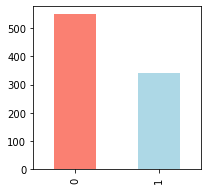

0    549
1    342
Name: Survived, dtype: int64

In [3]:
plt.figure(figsize=(3,3))
df.Survived.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.show()
df.Survived.value_counts()

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

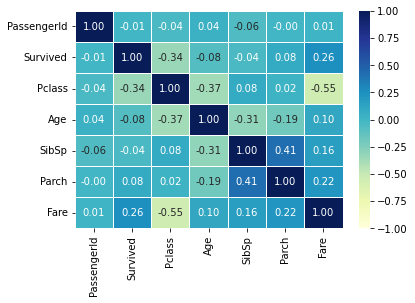

In [7]:
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, 
            annot=True, 
            vmax= 1,vmin=-1,
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

## Dealing with missing data

Now as we found out that our data has a fair bit of missing values and we need to deal with them so that our model is able to learn efficiently if there is missing data our model will be totally useless.

There are a few ways we can fix missing values we can try to fill them up using mean or mode of the values and entirely drop the columns if there are too many missing values. If a dataset column has alot of missing values and you decide to fill them up our model might not perfrom as intended in the real world so you should be vary of where to use which techique 

In [8]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
np.mean(df.Age)

29.69911764705882

In [11]:
df.Age.fillna(np.mean(df.Age), inplace = True)

> inplace = True means save our changes to our original dataframe

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [15]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
891 - 687

204

In [18]:
df.drop(['Cabin'],axis = 1, inplace=True)

In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

![](anadf.png)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [21]:
df.Sex.replace(['male','female'],[1,0], inplace =True)

In [22]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C


In [23]:
df.Embarked.replace(['S','C','Q'],[0,1,2], inplace =True)

In [24]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [26]:
df.drop(['Name','Ticket','PassengerId'],axis = 1, inplace= True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


## Finally Data is cleaned

These were the things we did in this previous section
- Filled in missing data for Age and Embarked Column
- Removed the Cabin column because it was missing alot of data
- Removed Name, Ticket, PassengerId as we saw it didn't effect our survived column that much
- Converted all columns to numbers

But the problem with our data is that columns such as embarked and Sex have values that the computer might interpret as not in the form of discrete nature
That is why we need to do **One-Hot Encoding** on some of the columns

One-hot encoding is the process by which categorical data are converted into numerical data for use in machine learning. Categorical features are turned into binary features that are “one-hot” encoded, meaning that if a feature is represented by that column, it receives a 1. Otherwise, it receives a 0.

![](https://miro.medium.com/max/837/1*d5-PQyRRjvzBZjI5f7X3hA.png)

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
                (OneHotEncoder(), ['Sex','Embarked']),
                remainder='passthrough')
transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)
transformed_df.head()

,onehotencoder__Sex_0,onehotencoder__Sex_1,onehotencoder__Embarked_0,onehotencoder__Embarked_1,onehotencoder__Embarked_2,remainder__Survived,remainder__Pclass,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare
0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,0.0,1.0,0.0,0.0,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,1.0,1.0,0.0,0.0,0.0,3.0,35.0,0.0,0.0,8.0500


In [29]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   onehotencoder__Sex_0       891 non-null    float64
 1   onehotencoder__Sex_1       891 non-null    float64
 2   onehotencoder__Embarked_0  891 non-null    float64
 3   onehotencoder__Embarked_1  891 non-null    float64
 4   onehotencoder__Embarked_2  891 non-null    float64
 5   remainder__Survived        891 non-null    float64
 6   remainder__Pclass          891 non-null    float64
 7   remainder__Age             891 non-null    float64
 8   remainder__SibSp           891 non-null    float64
 9   remainder__Parch           891 non-null    float64
 10  remainder__Fare            891 non-null    float64
dtypes: float64(11)
memory usage: 76.7 KB


## 2. Getting down to training our model

To train our model we have to seperate labels from features and then do train test splits afterwards fit the model and evaluate it

### Seperating Labels From Features

In [30]:
x = transformed_df.drop(['remainder__Survived'], axis =1 )
y = transformed_df.remainder__Survived

### Training and test split

Now comes one of the most important concepts in machine learning, the **training/test split**.

This is where you'll split your data into a **training set** and a **test set**.

You use your training set to train your model and your test set to test it.

The test set must remain separate from your training set.


In [31]:
from sklearn.model_selection import train_test_split

# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

![](https://miro.medium.com/max/1202/1*eFydLxeFcmg8Grn1eKOVXQ.png)

### Model choices

![](https://scikit-learn.org/stable/_static/ml_map.png)


Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
4. SVC - [`SVC()`](https://scikit-learn.org/stable/modules/svm.html#classification)

In [32]:
# importing all of our models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [33]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=1000), 
          "Random Forest": RandomForestClassifier(),
          "SVC": SVC()
         }

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test) *100
    return model_scores

In [34]:
model_scores = fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

{'KNN': 71.50837988826815,
 'Logistic Regression': 81.00558659217877,
 'Random Forest': 79.88826815642457,
 'SVC': 65.92178770949721}

## 3. Model Comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

<Figure size 144x144 with 0 Axes>

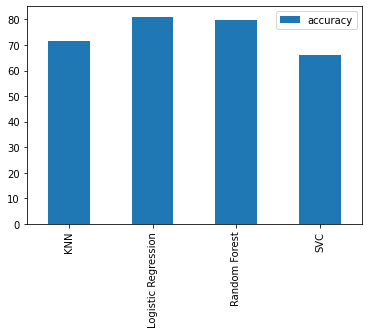

In [35]:
plt.figure(figsize=(2,2))
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

## 4. Tunning your models

Now from the graph we can see that our logistic regression performs the best and the random Forest model is just behind it. Is there any way we can possibly further improve our score so we can get more accuracy from our data.
It depends there are several ways we can try. We can try to change different parameters that the model takes we can take more and more amounts of data and retrain our model on that. You can search more ways on the web.

## Tuning the Logistic Regression Model

We will only work on tunning the Logistic regression model as it seems to be on top, but you can try on the other models aswell.

### Tuning models with with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
Reading the Scikit-Learn documentation for [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV), we find there's a number of different hyperparameters we can tune. Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [36]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"C": np.logspace(-1, 15, 40),
        "solver": ["liblinear"]}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
lr_model = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
lr_model.fit(x_train, y_train);
lr_score = lr_model.score(x_test,y_test)
print(f"Random Search CV Logistic Regression Score: {lr_score*100:2f} %")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Search CV Logistic Regression Score: 78.212291 %


### Tuning a model with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

The difference between `RandomizedSearchCV` and `GridSearchCV` is where `RandomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations, `GridSearchCV` will test every single possible combination.

In short:
* `RandomizedSearchCV` - tries `n_iter` combinations of hyperparameters and saves the best.
* `GridSearchCV` - tries every single combination of hyperparameters and saves the best.

Let's see it in action.

In [37]:
from sklearn.model_selection import GridSearchCV

# Different LogisticRegression hyperparameters
grid = {"C": np.logspace(-1, 10, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_lr = GridSearchCV(LogisticRegression(),
                          param_grid=grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_lr.fit(x_train, y_train);
gs_lr_score = gs_lr.score(x_test,y_test)
print(f"Grid Search CV Logistic Regression Score: {gs_lr_score*100:2f} %")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Grid Search CV Logistic Regression Score: 78.212291 %


<BarContainer object of 1 artists>

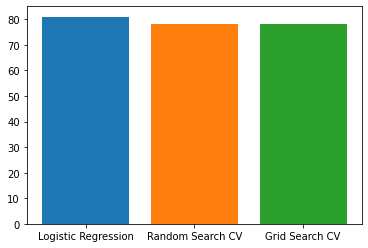

In [38]:
plt.bar('Logistic Regression', model_scores['Logistic Regression'])
plt.bar('Random Search CV', lr_score*100)
plt.bar('Grid Search CV', gs_lr_score*100)



So You can try to improve it further but I will continue with the base model and use it for the next step which is evaluation

In [39]:
# This is our base model

model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8100558659217877

## 5. Evaluating a classification model, beyond accuracy

Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:
* ROC curve and AUC score - [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Luckily, Scikit-Learn has these all built-in.

To access them, we'll have to use our model to make predictions on the test set. You can make predictions by calling `predict()` on a trained model and passing it the data you'd like to predict on.

We'll make predictions on the test data.

In [40]:
y_preds = model.predict(x_test)

### ROC Curve and AUC Scores

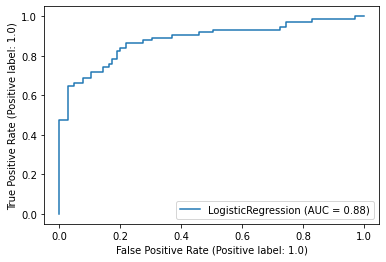

In [41]:
# Import ROC curve function from metrics module
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(model,x_test,y_test);

### Confusion matrix 

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and passing it the true labels and predicted labels.

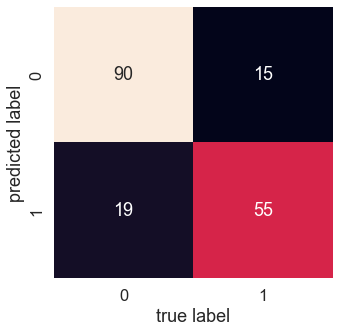

In [48]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label")
sns.set(font_scale=3)
plt.show()


### Classification report

We can make a classification report using [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and passing it the true labels as well as our models predicted labels. 

A classification report will also give us information of the precision and recall of our model for each class.

In [43]:
from sklearn.metrics import classification_report
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       105
         1.0       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).


## 6. Experimentation

Well we've managed to train our model. You should be able to put together a great report containing a confusion matrix, a handful of cross-valdated metrics such as precision, recall and F1 as well as which features contribute most to the model making a decision.

From trying different models, to tuning different models to figuring out which hyperparameters were best. What we've worked through so far has been a series of experiments. And the truth is, we could keep going. But of course, things can't go on forever. So by this stage, after trying a few different things, we'd ask ourselves did we meet the evaluation metric?

The highest accuracy our model achieved was below 90%.

#### What next?

You might be wondering, what happens when the evaluation metric doesn't get hit? Is everything we've done wasted?

No.

It means we know what doesn't work. In this case, we know the current model we're using (a tuned version of `LogisticRegression`) along with our specific data set doesn't hit the target we set ourselves.

This is where step 6 comes into its own.

A good next step would be to discuss with your team or research on your own different options of going forward.

* Could you collect more data?

* Could you try a better model? If you're working with structured data, you might want to look into [CatBoost](https://catboost.ai/) or [XGBoost](https://xgboost.ai/).

* Could you improve the current models (beyond what we've done so far)?

The key here is to remember, your biggest restriction will be time. Hence, why it's paramount to minimise your times between experiments.

The more you try, the more you figure out what doesn't work, the more you'll start to get a hang of what does.

## 7. Saving your models

In [44]:
from joblib import dump,load
dump(model, filename= 'titanic.joblib')

['titanic.joblib']

In [45]:
# to load the model you can do 
loadmodel = load('titanic.joblib')

<br>
<br>













## NoteBook Credits and Citations

This notebook has been created by **Alpha MLSA Hamas ur Rehman** student at UET Peshawar
<img align="right" src="mlsalogo.png" alt="mlsa_logo" width="100"/> 
<img align="right" src="uetp.png" alt="mlsa_logo" width="100"/> 


Dataset was downloaded from [kaggle](https://www.kaggle.com/)

Images used from
- miro.medium
- Scikit-Learn
- zerotomastery.io

Content inspiration from **Andrei Neagoie & Daniel Bourke** course called [Complete Machine Learning and Data Science Bootcamp](https://zerotomastery.io/courses/machine-learning-and-data-science-bootcamp/)

